In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.optimize import minimize
from tqdm.notebook import tqdm

In [2]:
Y = np.array([1, 5, 2]).reshape(1, -1).T
PSI = np.array([[1, 0],
                [0, 1],
                [1, 1]])
Xn = np.hstack((PSI, Y))

In [4]:
{
 "cells": [],
 "metadata": {},
 "nbformat": 4,
 "nbformat_minor": 5
}

def linear_regression(sample, regularization=None, c=1):
    PSI, Y = sample[:, :-1], sample[:, -1]
    F = PSI.T @ PSI
    beta_wave = np.linalg.inv(F) @ PSI.T @ Y
    if regularization == 'lasso':
        def lagrange_function(x):
            e = Y - PSI@x
            L = (e.T@e) + c*(np.sum(abs(x)))
            return L
        result = minimize(lagrange_function, beta_wave, method='Nelder-Mead')
        beta_wave = result.x
    elif regularization == 'ridge':        
        def lagrange_function(x):
            e = Y - PSI@x
            L = (e.T@e) + c*(np.sum(x**2))
            return L
        result = minimize(lagrange_function, beta_wave, method='Nelder-Mead')
        beta_wave = result.x
    return beta_wave

beta_wave = linear_regression(Xn)
a, b = beta_wave
print(a, b)

-0.33333333333333326 3.6666666666666665


In [11]:
def cross_validation(sample, regularization=None, c=1):
    n = np.size(sample, axis=0)
    CVSS = 0
    for i in range(n):
        train_batch_cur = np.delete(sample, (i), axis=0)
        sample_cur = sample[i, :]
        beta = linear_regression(train_batch_cur, regularization=regularization, c=c)
        x, y = sample_cur[:-1], sample_cur[-1]
        y_wave = np.dot(beta, x)
        CVSS += (y - y_wave) ** 2
    return CVSS

CVSS = cross_validation(Xn)
print(CVSS)

48.0


In [12]:
def CVSS_search_lamda(sample, regularization=None):
    lamdas = np.arange(0, 12, 10e-4)
    min_lamda, min_CVSS = 0, np.inf
    CVSSs = []
    for lamda in tqdm(lamdas):
        CVSS = cross_validation(sample, regularization=regularization, c=lamda)
        CVSSs.append(CVSS)
        if CVSS < min_CVSS:
            min_CVSS = CVSS
            min_lamda = lamda
    return min_lamda, min_CVSS, lamdas, CVSSs

In [24]:
min_lamda, min_CVSS, lamdas, CVSSs = CVSS_search_lamda(Xn, regularization='ridge')

  0%|          | 0/12000 [00:00<?, ?it/s]

In [25]:
beta_wave = linear_regression(Xn, regularization='ridge', c=min_lamda)
a, b = beta_wave
print(a, b)
print('lambda_min =', min_lamda)
print('CVSS_min =', min_CVSS)

0.31191352284835655 1.9048683700790643
lambda_min = 1.5110000000000001
CVSS_min = 21.264683978399066


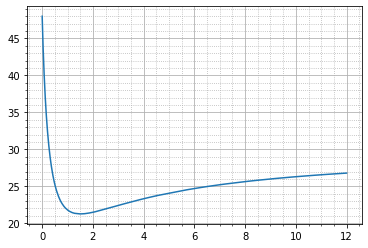

In [26]:
plt.plot(lamdas, CVSSs)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

In [19]:
min_lamda, min_CVSS, lamdas, CVSSs = CVSS_search_lamda(Xn, regularization='lasso')

  0%|          | 0/12000 [00:00<?, ?it/s]

In [21]:
beta_wave = linear_regression(Xn, regularization='ridge', c=min_lamda)
a, b = beta_wave
print(a, b)
print('lambda_min =', min_lamda)
print('CVSS_min =', min_CVSS)

0.26992548226581875 0.8414308056952371
lambda_min = 5.998
CVSS_min = 25.99999965799884


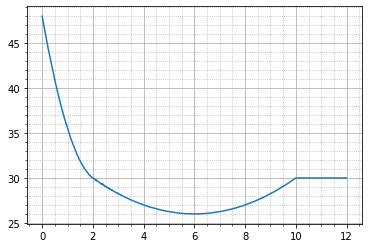

In [22]:
plt.plot(lamdas, CVSSs)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')